In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Ravdess_TRAIN_transformed.csv')
df_test=pd.read_csv('Ravdess_TEST_transformed.csv')
df

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,sum,max,q25,...,stft_sum_w4,stft_std_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,0,1,0,1,1,1,0,0.328567,-0.391762,0.342857,...,0.135483,-1.096766,-0.402429,1.421380,0.948188,0.831973,0.536448,0.0,10.826275,-2.710136
1,0,1,0,1,2,1,0,0.272964,-0.346159,0.342857,...,-0.196060,-1.013205,1.702463,1.092210,0.597843,0.441189,0.253557,0.0,0.064887,0.425032
2,0,1,0,0,1,1,0,0.337392,-0.284007,0.371429,...,-0.307833,-0.716367,-0.402429,0.899688,0.680414,0.652634,0.569396,0.0,3.519767,-1.290314
3,0,1,0,0,2,1,0,0.318693,-0.258631,0.342857,...,-0.607848,-0.803778,1.346476,0.835496,0.532143,0.515441,0.405521,0.0,0.218601,-0.015380
4,0,2,0,1,1,1,0,0.315162,-0.478371,0.342857,...,0.145139,-0.863050,1.018057,0.935801,0.644804,0.549313,0.296205,0.0,1.260594,-0.448574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,0,8,0,0,2,18,1,-0.212894,-0.426884,0.371429,...,-0.631100,0.407872,-0.402429,-0.568068,0.272635,0.320467,0.493310,0.0,1.457767,-1.346654
1824,0,8,1,1,1,18,1,-0.186141,-0.196663,0.342857,...,-0.887878,0.718169,-0.402429,-0.568068,-0.402428,0.139088,0.581452,0.0,-0.162612,-0.423159
1825,0,8,1,1,2,18,1,-0.314997,-0.216890,0.371429,...,-0.910208,0.339948,-0.402429,-0.225264,-0.114307,0.022347,0.470287,0.0,0.128201,-0.378094
1826,0,8,1,0,1,18,1,-0.088892,-0.214683,0.342857,...,-0.445016,0.715166,-0.402429,-0.568068,0.037070,0.207317,0.187007,0.0,0.356091,-0.924174


In [7]:
X, y = df.drop(["mfcc_q05"], axis=1), df[["mfcc_q05"]].values.flatten()
X2, y2 = df_test.drop(["mfcc_q05"], axis=1), df_test[["mfcc_q05"]].values.flatten()

X_train, y_train = X, y
X_test, y_test = X2, y2

In [24]:
X.shape

(1828, 283)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_error
from sklearn.svm import SVR, SVC, LinearSVR

In [47]:
%%time
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("R-squared (R2): {:.2f}".format(r2))

Mean Squared Error (MSE): 0.11
R-squared (R2): 0.82
CPU times: total: 16min
Wall time: 16min


In [26]:
%%time
svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared (R2): {:.2f}".format(r2))

Mean squared error: 0.21835496017982556
R-squared (R2): 0.64
CPU times: total: 547 ms
Wall time: 547 ms


In [9]:
%%time
svm = SVR(kernel='poly', degree=2)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared (R2): {:.2f}".format(r2))

Mean squared error: 0.5715452811581795
R-squared (R2): 0.05
CPU times: total: 828 ms
Wall time: 830 ms


C:\Users\linov\AppData\Local\Temp\ipykernel_6732\1882976107.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y[order].astype(np.float)


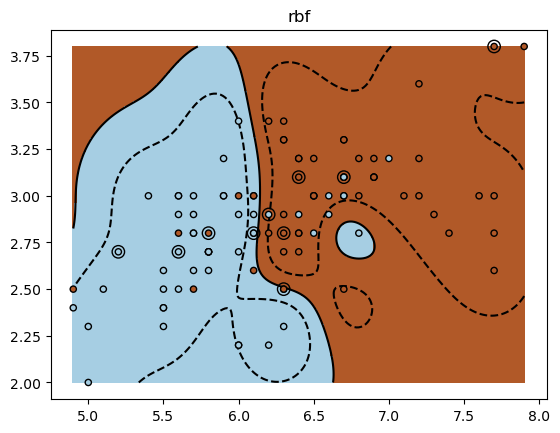

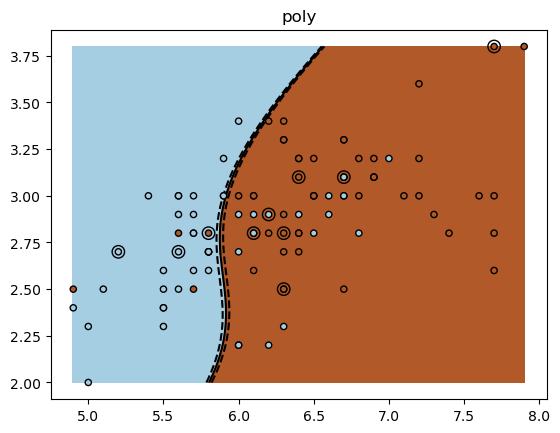

In [50]:
#codice del prof

from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for kernel in ('rbf', 'poly'):
    clf = SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

## GridSearch on poly and rbf kernels

In [51]:
from sklearn.model_selection import GridSearchCV

svm_poly = SVR(kernel='poly')
scorer = make_scorer(r2_score)

param_grid = {
    'gamma': ['scale', 'auto'],
    'C': [1000, 100, 10, 1, 0.1, 0.01, 0.001],
    'epsilon': [0.01, 0.1, 1, 10],
    'degree': [2, 3, 4, 5]
}


grid_search = GridSearchCV(svm_poly, param_grid=param_grid, cv=5, n_jobs=-1, scoring=scorer)
grid_search.fit(X_train, y_train)


print("Best hyperparameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 0.01, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale'}
Best R2 score:  0.1761705926283313


In [52]:
from sklearn.model_selection import GridSearchCV

svm_rbf = SVR(kernel='rbf')
scorer = make_scorer(r2_score)

param_grid = {
    'gamma': ['scale', 'auto'],
    'C': [100, 10, 1, 0.1, 0.01],
    'epsilon': [0.001, 0.01, 0.1, 1, 10, 100],
}


grid_search = GridSearchCV(svm_rbf, param_grid=param_grid, cv=5, n_jobs=-1, scoring=scorer)
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 0.1, 'epsilon': 0.001, 'gamma': 'scale'}
Best R2 score:  0.14846201244885288


## Checking for overfitting

In [11]:
svm = SVR(kernel='poly', C=0.01, degree=2, epsilon=0.1, gamma='scale') #according to next plot epsilon=0.3
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Compute the R2 score
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)

# Compute mse
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training R2 score: {:.2f}".format(train_score))
print("Testing R2 score: {:.2f}".format(test_score))

print("Training MSE score: {:.2f}".format(train_mse))
print("Testing MSE score: {:.2f}".format(test_mse))

Training R2 score: 0.04
Testing R2 score: 0.01
Training MSE score: 0.58
Testing MSE score: 0.59


# R2

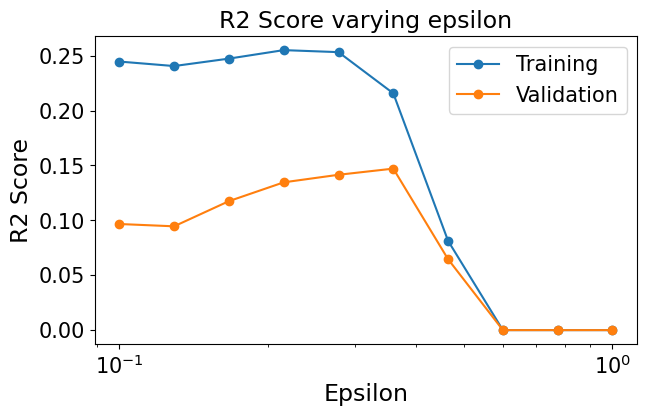

In [54]:
epsilon_range = np.geomspace(0.1, 1, num=10)

r2_scores_train = []
r2_scores_test = []

for epsilon in epsilon_range:
    model = SVR(kernel='poly', C=0.01, degree=2, epsilon=epsilon, gamma='scale')
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    r2_scores_train.append(r2_score(y_train, y_pred_train))
    r2_scores_test.append(r2_score(y_test, y_pred_test))

# Plot the R2 scores as a function of epsilon
fig = plt.subplots(figsize=(7, 4))
plt.plot(epsilon_range, r2_scores_train, 'o-', label='Training')
plt.plot(epsilon_range, r2_scores_test, 'o-', label='Validation')
plt.xscale('log')
plt.xlabel('Epsilon', fontsize=17)
plt.ylabel('R2 Score', fontsize=17)
plt.tick_params(axis='both', labelsize=15)
plt.title('R2 Score varying epsilon', fontsize=17)
plt.legend(fontsize=15)
plt.show()

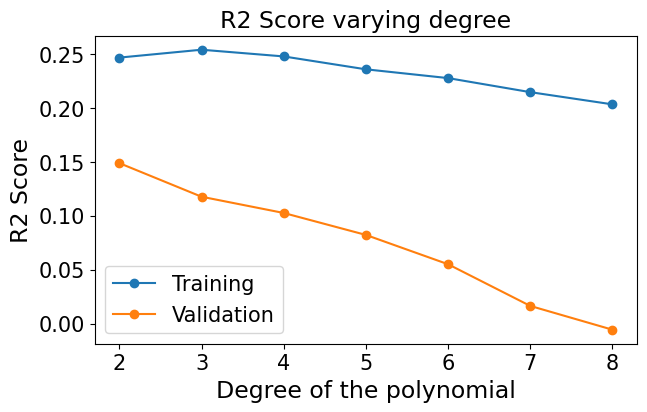

In [55]:
degrees = [2, 3, 4, 5, 6, 7, 8]

r2_scores_train = []
r2_scores_test = []

for degree in degrees:
    model = SVR(kernel='poly', degree=degree, C=0.01, epsilon=0.3, gamma='scale')
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    r2_scores_train.append(r2_score(y_train, y_pred_train))
    r2_scores_test.append(r2_score(y_test, y_pred_test))

# Plot the R2 scores as a function of epsilon
fig = plt.subplots(figsize=(7, 4))
plt.plot(degrees, r2_scores_train, 'o-', label='Training')
plt.plot(degrees, r2_scores_test, 'o-', label='Validation')
plt.xlabel('Degree of the polynomial', fontsize=17)
plt.ylabel('R2 Score', fontsize=17)
plt.tick_params(axis='both', labelsize=15)
plt.title('R2 Score varying degree', fontsize=17)
plt.legend(fontsize=15)
plt.show()

# MSE

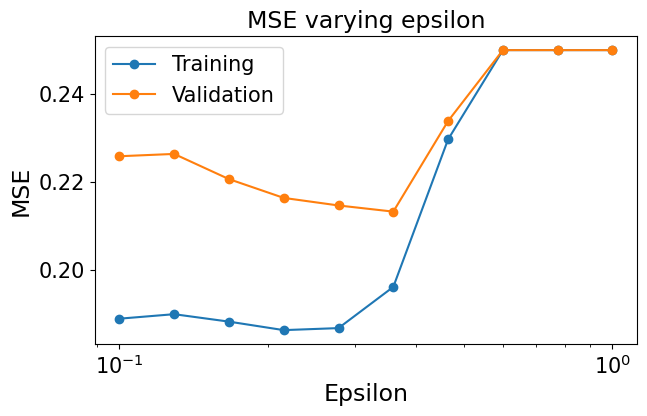

In [56]:
epsilon_range = np.geomspace(0.1, 1, num=10)

mse_scores_train = []
mse_scores_test = []

for epsilon in epsilon_range:
    model = SVR(kernel='poly', C=0.01, degree=2, epsilon=epsilon, gamma='scale')
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    mse_scores_train.append(mean_squared_error(y_train, y_pred_train))
    mse_scores_test.append(mean_squared_error(y_test, y_pred_test))

# Plot the R2 scores as a function of epsilon
fig = plt.subplots(figsize=(7, 4))
plt.plot(epsilon_range, mse_scores_train, 'o-', label='Training')
plt.plot(epsilon_range, mse_scores_test, 'o-', label='Validation')
plt.xscale('log')
plt.xlabel('Epsilon', fontsize=17)
plt.ylabel('MSE', fontsize=17)
plt.tick_params(axis='both', labelsize=15)
plt.title('MSE varying epsilon', fontsize=17)
plt.legend(fontsize=15)
plt.show()

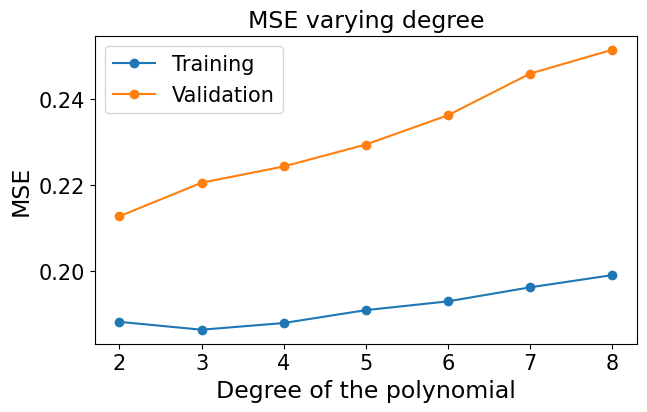

In [59]:
degrees = [2, 3, 4, 5, 6, 7, 8]

mse_scores_train = []
mse_scores_test = []

for degree in degrees:
    model = SVR(kernel='poly', degree=degree, C=0.01, epsilon=0.3, gamma='scale')
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    mse_scores_train.append(mean_squared_error(y_train, y_pred_train))
    mse_scores_test.append(mean_squared_error(y_test, y_pred_test))

# Plot the R2 scores as a function of epsilon
fig = plt.subplots(figsize=(7, 4))
plt.plot(degrees, mse_scores_train, 'o-', label='Training')
plt.plot(degrees, mse_scores_test, 'o-', label='Validation')
plt.xlabel('Degree of the polynomial', fontsize=17)
plt.ylabel('MSE', fontsize=17)
plt.tick_params(axis='both', labelsize=15)
plt.title('MSE varying degree', fontsize=17)
plt.legend(fontsize=15)
plt.show()

# RBF Analysis

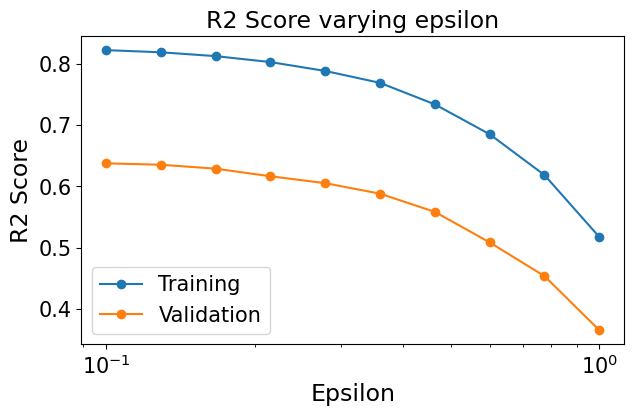

In [14]:
epsilon_range = np.geomspace(0.1, 1, num=10)

r2_scores_train = []
r2_scores_test = []

for epsilon in epsilon_range:
    model = SVR(kernel='rbf', C=1, epsilon=epsilon, gamma='scale')
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    r2_scores_train.append(r2_score(y_train, y_pred_train))
    r2_scores_test.append(r2_score(y_test, y_pred_test))

# Plot the R2 scores as a function of epsilon
fig = plt.subplots(figsize=(7, 4))
plt.plot(epsilon_range, r2_scores_train, 'o-', label='Training')
plt.plot(epsilon_range, r2_scores_test, 'o-', label='Validation')
plt.xscale('log')
plt.xlabel('Epsilon', fontsize=17)
plt.ylabel('R2 Score', fontsize=17)
plt.tick_params(axis='both', labelsize=15)
plt.title('R2 Score varying epsilon', fontsize=17)
plt.legend(fontsize=15)
plt.show()

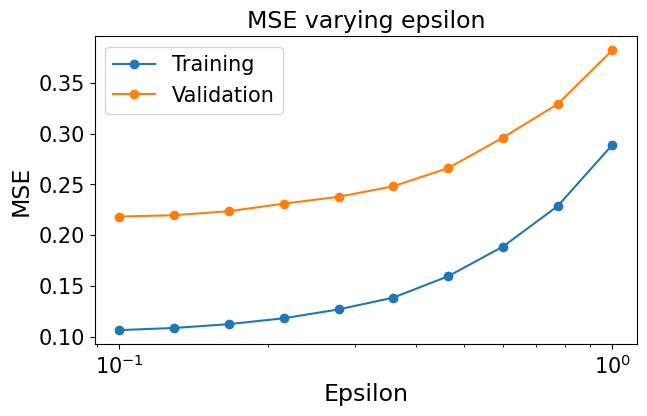

In [15]:
epsilon_range = np.geomspace(0.1, 1, num=10)

mse_scores_train = []
mse_scores_test = []

for epsilon in epsilon_range:
    model = SVR(kernel='rbf', C=1, epsilon=epsilon, gamma='scale')
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    mse_scores_train.append(mean_squared_error(y_train, y_pred_train))
    mse_scores_test.append(mean_squared_error(y_test, y_pred_test))

# Plot the R2 scores as a function of epsilon
fig = plt.subplots(figsize=(7, 4))
plt.plot(epsilon_range, mse_scores_train, 'o-', label='Training')
plt.plot(epsilon_range, mse_scores_test, 'o-', label='Validation')
plt.xscale('log')
plt.xlabel('Epsilon', fontsize=17)
plt.ylabel('MSE', fontsize=17)
plt.tick_params(axis='both', labelsize=15)
plt.title('MSE varying epsilon', fontsize=17)
plt.legend(fontsize=15)
plt.show()

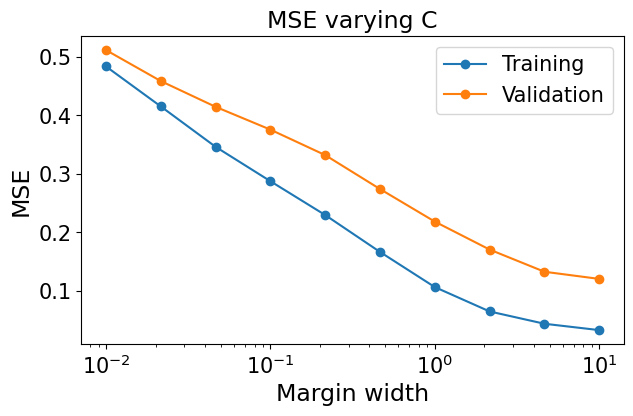

In [19]:
Cs = np.geomspace(0.01, 10, num=10)

mse_scores_train = []
mse_scores_test = []

for C in Cs:
    model = SVR(kernel='rbf', C=C, epsilon=0.1, gamma='scale')
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    mse_scores_train.append(mean_squared_error(y_train, y_pred_train))
    mse_scores_test.append(mean_squared_error(y_test, y_pred_test))

# Plot the R2 scores as a function of epsilon
fig = plt.subplots(figsize=(7, 4))
plt.plot(Cs, mse_scores_train, 'o-', label='Training')
plt.plot(Cs, mse_scores_test, 'o-', label='Validation')
plt.xscale('log')
plt.xlabel('Margin width', fontsize=17)
plt.ylabel('MSE', fontsize=17)
plt.tick_params(axis='both', labelsize=15)
plt.title('MSE varying C', fontsize=17)
plt.legend(fontsize=15)
plt.show()

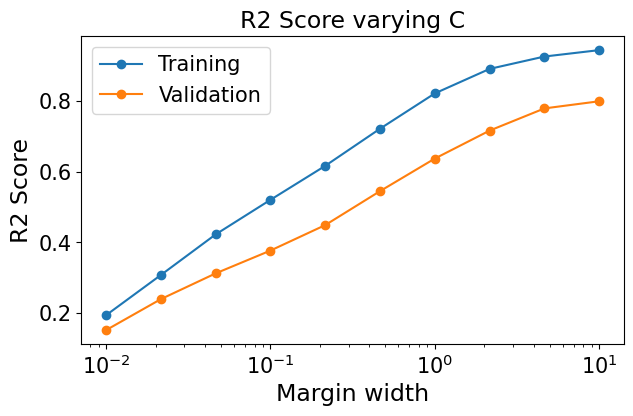

In [25]:
Cs = np.geomspace(0.01, 10, num=10)

r2_scores_train = []
r2_scores_test = []

for C in Cs:
    model = SVR(kernel='rbf', C=C, epsilon=0.1, gamma='scale')
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    r2_scores_train.append(r2_score(y_train, y_pred_train))
    r2_scores_test.append(r2_score(y_test, y_pred_test))

# Plot the R2 scores as a function of epsilon
fig = plt.subplots(figsize=(7, 4))
plt.plot(Cs, r2_scores_train, 'o-', label='Training')
plt.plot(Cs, r2_scores_test, 'o-', label='Validation')
plt.xscale('log')
plt.xlabel('Margin width', fontsize=17)
plt.ylabel('R2 Score', fontsize=17)
plt.tick_params(axis='both', labelsize=15)
plt.title('R2 Score varying C', fontsize=17)
plt.legend(fontsize=15)
plt.show()

## Best Result: rbf, epsilon=0.1, C=10, gamma=scale

In [51]:
svm = SVR(kernel='rbf', epsilon=0.1, gamma='scale', C=10)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared (R2): {:.2f}".format(r2))
print("Mean absolute error:", mae)

Mean squared error: 0.12049348776188855
R-squared (R2): 0.80
Mean absolute error: 0.26034483542847897


# SVM Plot

In [57]:
import umap
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np

# Reduce the dimensionality of the dataset using UMAP
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(df)

# Train an SVR on the dataset
model = SVR(kernel='rbf', C=10, epsilon=0.1, gamma='scale')
model.fit(df.drop(['mfcc_q05'], axis=1), y)

# Generate a mesh grid of points to make a contour plot of the decision function
x_min, x_max = embedding[:, 0].min() - 1, embedding[:, 0].max() + 1
y_min, y_max = embedding[:, 1].min() - 1, embedding[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(reducer.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

# Reshape the predicted results into a mesh grid
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the margin
plt.contour(xx, yy, Z, colors='black', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('SVR with UMAP embedding and decision boundary')
plt.show()


KeyboardInterrupt: 